In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/naming.txt
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/speakers_info.json
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/naming.txt
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/speakers_info.json
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/51-m-20-2-2-767.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/56-f-40-2-0-627.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/56-f-40-2-1-639.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/55-m-16-2-2-809.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/4-m-20-2-0-699.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/50-f-5-2-0-519.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/55-m-16-2-1-800.wav
/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/50-f-5-2-2-598.wav
/kaggle/input

In [3]:
import os

paths = []
labels = []
counter = 0

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if counter < 4:
            counter += 1
            continue
        paths.append(os.path.join(dirname, filename))
        label = filename.split('-')[4]
        labels.append(label)

print('Dataset is Loaded')

Dataset is Loaded


In [4]:
paths[:5]

['/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/51-m-20-2-2-767.wav',
 '/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/56-f-40-2-0-627.wav',
 '/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/56-f-40-2-1-639.wav',
 '/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/55-m-16-2-2-809.wav',
 '/kaggle/input/basic-arabic-vocal-emotions-dataset/remake/remake/2/4-m-20-2-0-699.wav']

In [5]:
labels[:5]

['2', '0', '1', '2', '0']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/basic-arabic-vocal-emotions-data...,2
1,/kaggle/input/basic-arabic-vocal-emotions-data...,0
2,/kaggle/input/basic-arabic-vocal-emotions-data...,1
3,/kaggle/input/basic-arabic-vocal-emotions-data...,2
4,/kaggle/input/basic-arabic-vocal-emotions-data...,0


In [7]:
df['label'].value_counts()

2    1356
1    1344
0    1170
Name: label, dtype: int64

Exploratory Data Analysis

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

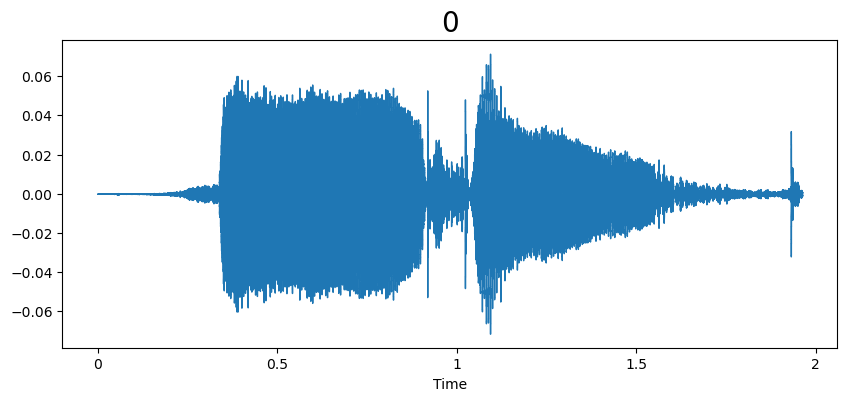

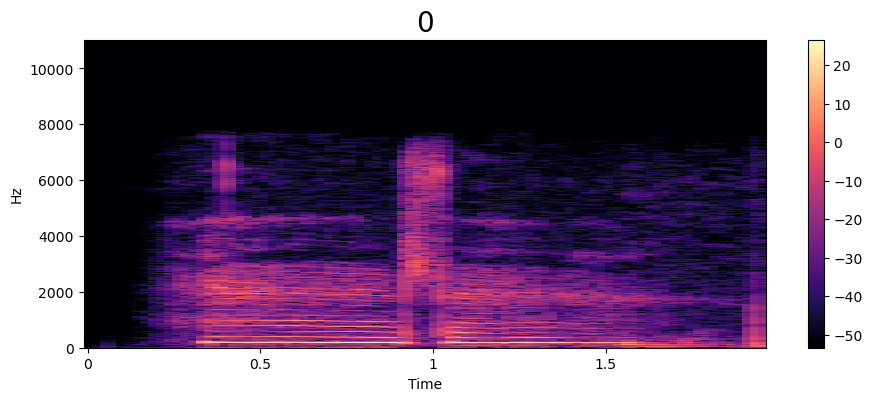

In [9]:
emotion = '0'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

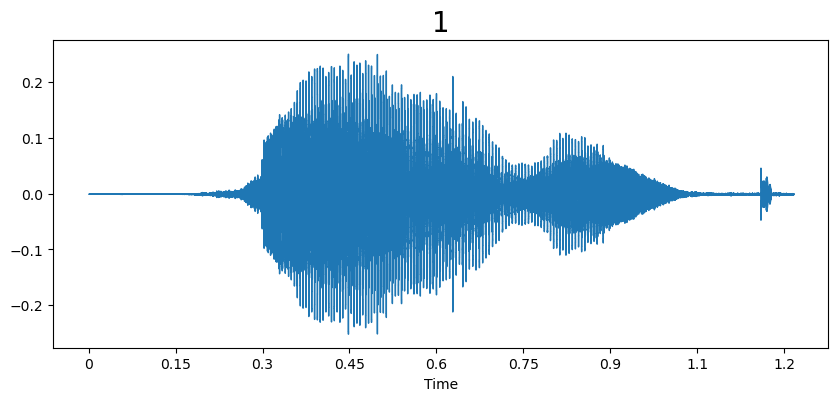

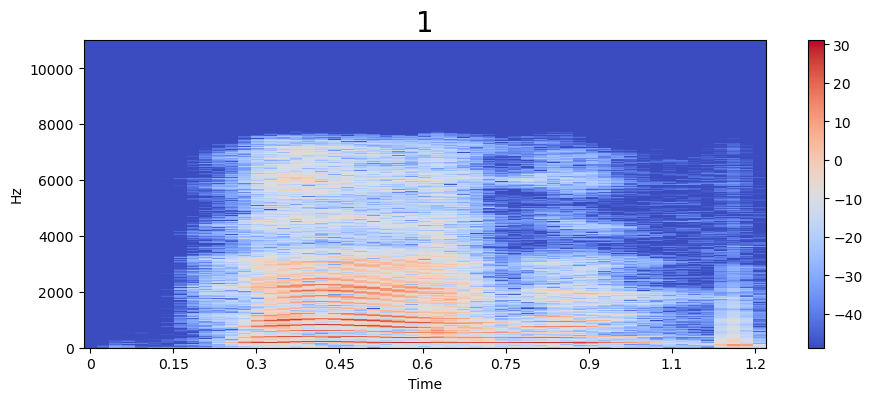

In [10]:
emotion = '1'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

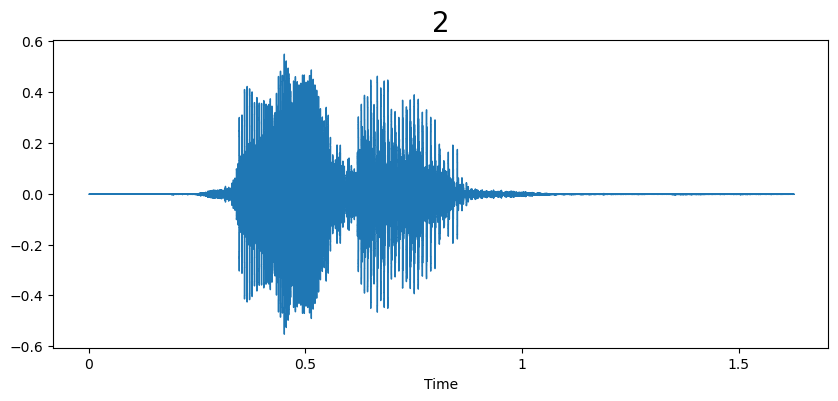

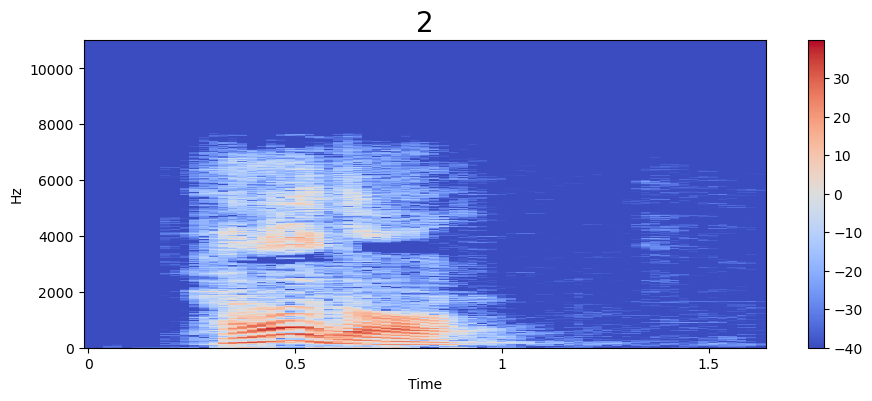

In [11]:
emotion = '2'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [12]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [13]:
extract_mfcc(df['speech'][0])

array([-4.3824646e+02,  1.0460605e+02,  1.3523787e+01,  1.4308090e+01,
       -2.4136629e+01,  9.4348316e+00, -9.1491528e+00, -5.5233282e-01,
        3.3162363e+00, -6.3809247e+00,  1.0870749e+00, -2.1808772e+00,
        1.1498016e+00, -2.2628920e+00, -6.1175555e-01, -1.0736229e+01,
       -7.6244645e+00, -7.8229046e-01, -5.0794315e+00, -3.0789235e+00,
       -5.4298887e+00, -8.0736532e+00, -3.8566282e+00, -3.5983131e+00,
       -7.2565179e+00, -1.6122199e+00, -5.1846004e+00, -5.9112973e+00,
       -1.4093586e+00, -2.4731815e+00, -1.6362925e+00, -1.0223894e+00,
       -4.6437827e-01, -2.5955420e+00, -1.3320124e+00, -7.2316438e-01,
       -2.4428433e-01,  7.0383817e-01, -5.4717135e-01,  2.4207269e-01],
      dtype=float32)

In [14]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [15]:
X_mfcc

0       [-438.24646, 104.60605, 13.523787, 14.30809, -...
1       [-452.67706, 136.60321, -34.388264, 39.44235, ...
2       [-369.03946, 148.15413, -43.695843, 27.403294,...
3       [-286.99326, 127.468895, -43.107143, 11.367134...
4       [-420.355, 147.06508, -20.420918, 27.514544, -...
                              ...                        
3865    [-427.71964, 157.0613, -29.320131, 56.93133, -...
3866    [-344.08157, 79.552, -0.27339873, 50.29124, -2...
3867    [-342.5189, 125.14811, -28.257294, 41.663208, ...
3868    [-295.59448, 60.20616, -16.71451, 62.102734, -...
3869    [-244.91655, 62.60414, -30.398428, 80.3276, -3...
Name: speech, Length: 3870, dtype: object

In [16]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3870, 40)

In [17]:
## input split
X = np.expand_dims(X, -1)
X.shape

(3870, 40, 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [19]:
y = y.toarray()

In [20]:
y.shape

(3870, 3)

LSTM Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 64)                7936      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 71,615
Trainable params: 71,615
Non-trai

In [24]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=6, batch_size=512, shuffle=True)

Epoch 1/6
7/7 [==============================] - 13s 138ms/step - loss: 1.0992 - accuracy: 0.3860 - val_loss: 1.0841 - val_accuracy: 0.4070
Epoch 2/6
7/7 [==============================] - 0s 18ms/step - loss: 1.0669 - accuracy: 0.4402 - val_loss: 1.0735 - val_accuracy: 0.4354
Epoch 3/6
7/7 [==============================] - 0s 18ms/step - loss: 1.0428 - accuracy: 0.4587 - val_loss: 1.0499 - val_accuracy: 0.4548
Epoch 4/6
7/7 [==============================] - 0s 18ms/step - loss: 1.0099 - accuracy: 0.4861 - val_loss: 1.0397 - val_accuracy: 0.4393
Epoch 5/6
7/7 [==============================] - 0s 18ms/step - loss: 0.9910 - accuracy: 0.5000 - val_loss: 1.0187 - val_accuracy: 0.4651
Epoch 6/6
7/7 [==============================] - 0s 16ms/step - loss: 0.9782 - accuracy: 0.5019 - val_loss: 1.0169 - val_accuracy: 0.4561


Plot the results

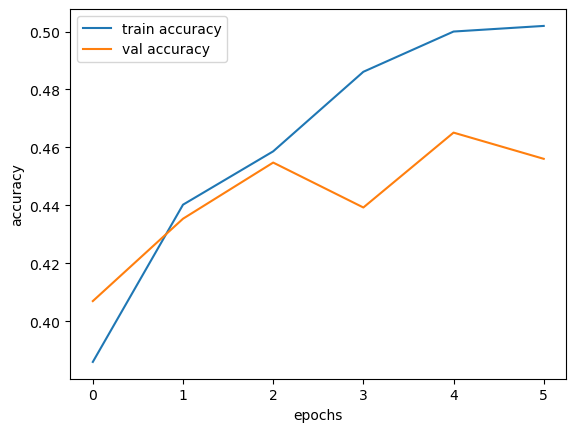

In [25]:
epochs = list(range(6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

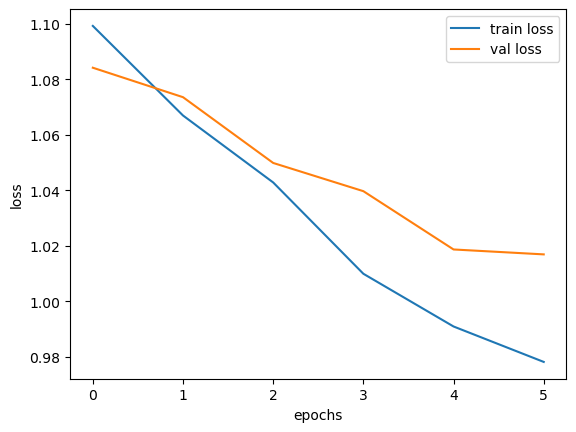

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()